In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

In [9]:
path = 'C:\\Users\\aftab\\Desktop\\Terroism Data\\dataset.csv' 

In [14]:
df = pd.read_csv(path, encoding="ISO-8859-1", low_memory = False)

In [17]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                       'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                       'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed',
       'Wounded','Target','extended','Group','Target_type','Weapon_type','Motive']]
pd.set_option('display.max_columns', None)

In [18]:
df.head(10)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,extended,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,0,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",0,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,0,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,0,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,0,Unknown,Government (Diplomatic),Incendiary,NaN
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,0,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment
6,1970,1,2,Uruguay,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,0,Tupamaros (Uruguay),Police,Firearms,NaN
7,1970,1,2,United States,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Edes Substation,0,Unknown,Utilities,Explosives,NaN
8,1970,1,2,United States,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...",0,New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft
9,1970,1,3,United States,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,0,New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181055 non-null  object 
 12  extended     181691 non-null  int64  
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
dtypes: float64(4), int64(4), object(9)
memory usage: 23.6+ MB


In [20]:
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,extended
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668,0.045346
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392,0.208063
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,0.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,1.000000


In [21]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Year            0.000000
Month           0.000000
Day             0.000000
Country         0.000000
Region          0.000000
city            0.238867
latitude        2.507554
longitude       2.508104
AttackType      0.000000
Killed          5.676120
Wounded         8.977330
Target          0.350045
extended        0.000000
Group           0.000000
Target_type     0.000000
Weapon_type     0.000000
Motive         72.171984
dtype: float64

In [22]:
df = df.loc[:, df.isnull().mean() < .6]

In [23]:
df.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,extended,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,0,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",0,23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,0,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,0,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,0,Unknown,Government (Diplomatic),Incendiary


In [24]:
df['Weapon_type'] = df['Weapon_type'].replace(['Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'], 'car or truck bombs')

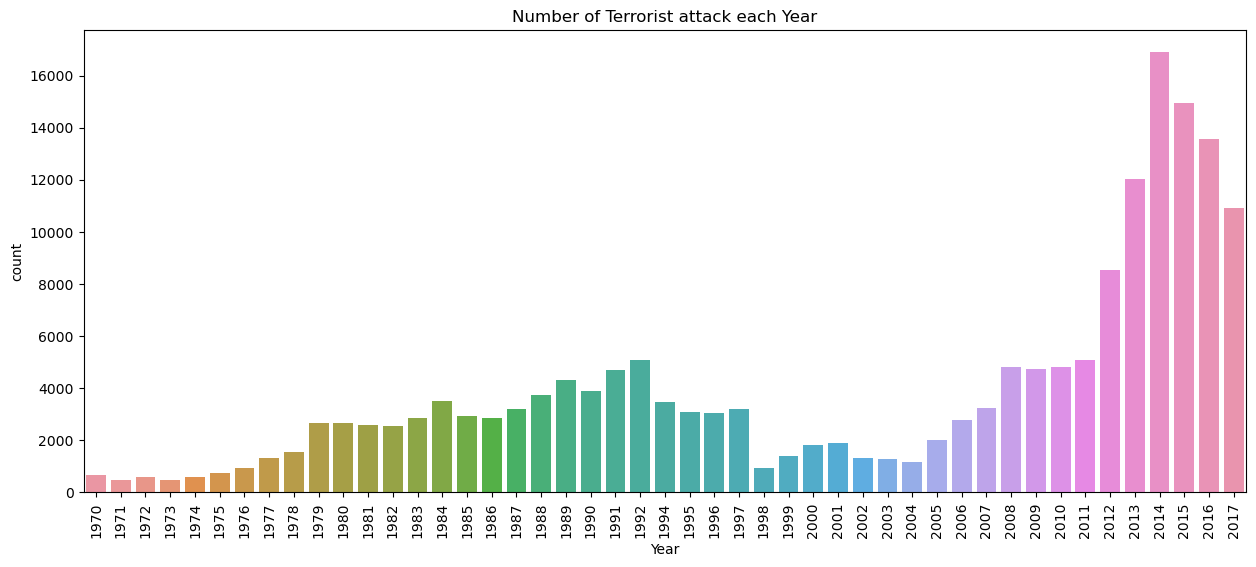

In [26]:
plt.subplots(figsize=(15,6))
sns.countplot(data=df,x='Year')
plt.xticks(rotation=90)
plt.title('Number of Terrorist attack each Year')
plt.show()

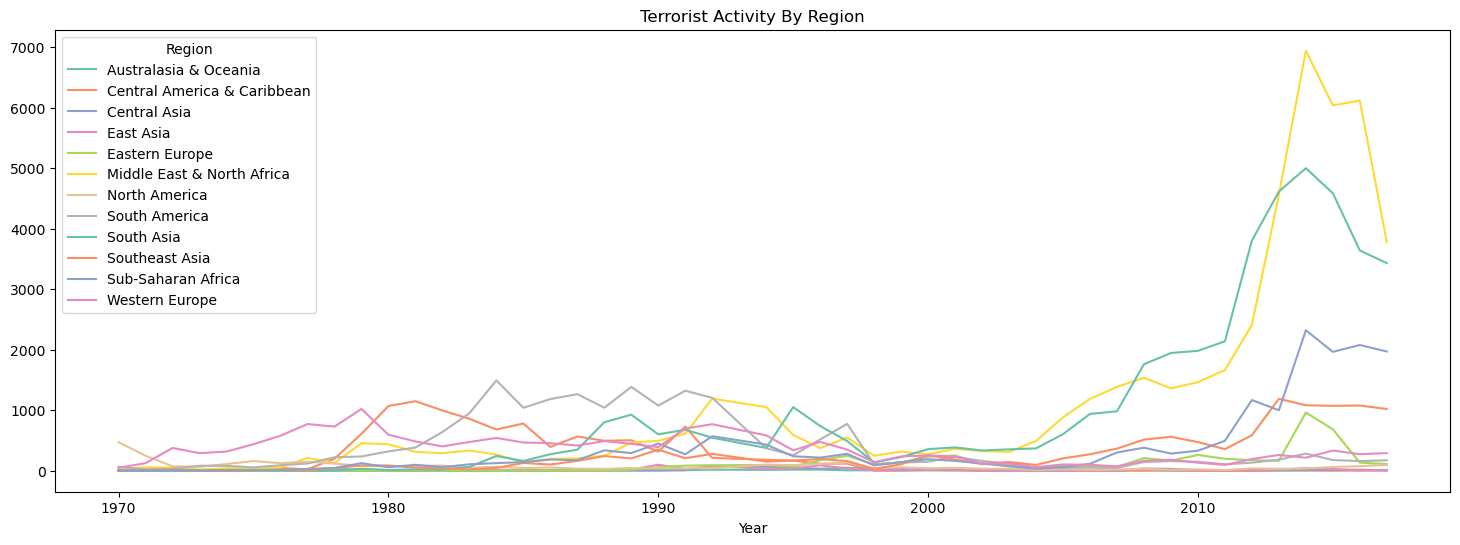

In [28]:
terror_region=pd.crosstab(df.Year,df.Region)
terror_region.plot(color=sns.color_palette('Set2',16))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Terrorist Activity By Region')
plt.show()

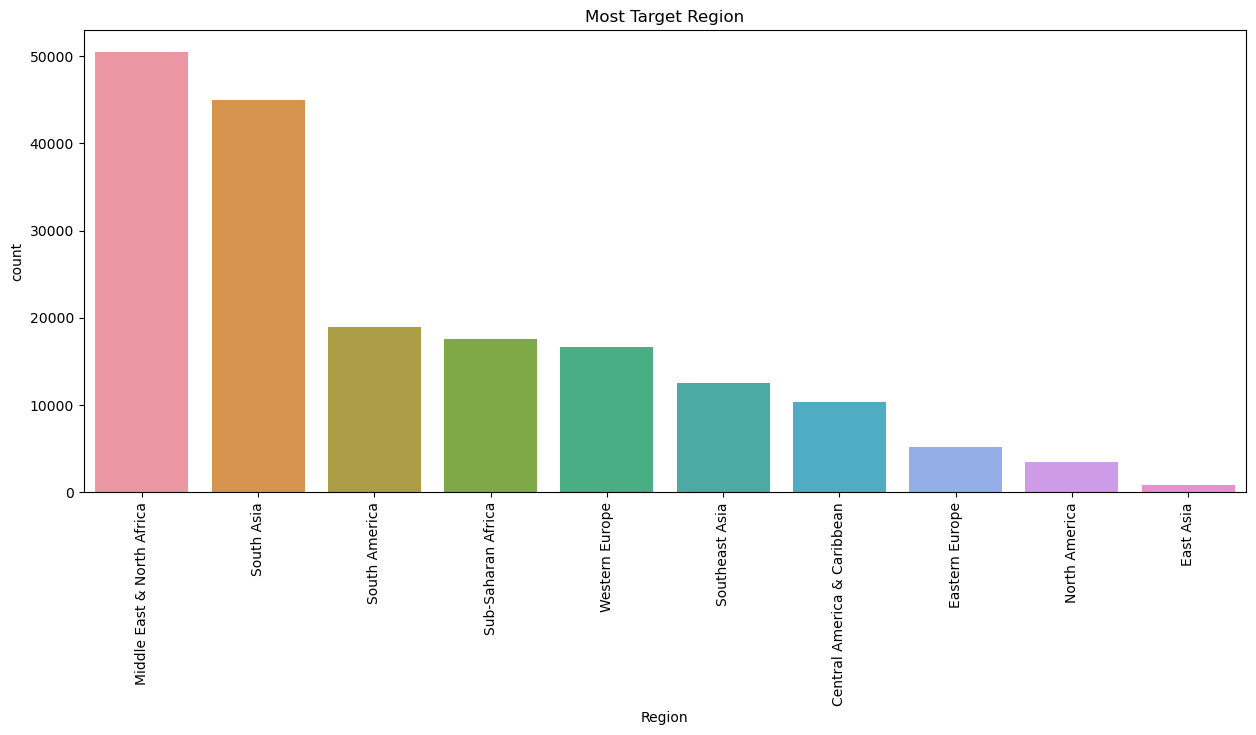

In [29]:
sns.set_palette("Spectral")
plt.subplots(figsize=(15,6))
sns.countplot(data=df,x='Region',order=df['Region'].value_counts().head(10).index) 
plt.xticks(rotation=90)
plt.title('Most Target Region')
plt.show()

In [33]:
country_counts = df['Country'].value_counts().head(10)

treemap_data = pd.DataFrame({'Country': country_counts.index, 'Count': country_counts.values})

fig = px.treemap(treemap_data, path=['Country'], values='Count',
                 title='Most Targeted Countries',
                 color='Count', color_continuous_scale='reds')


fig.update_layout(width=800, height=500)

fig.show()

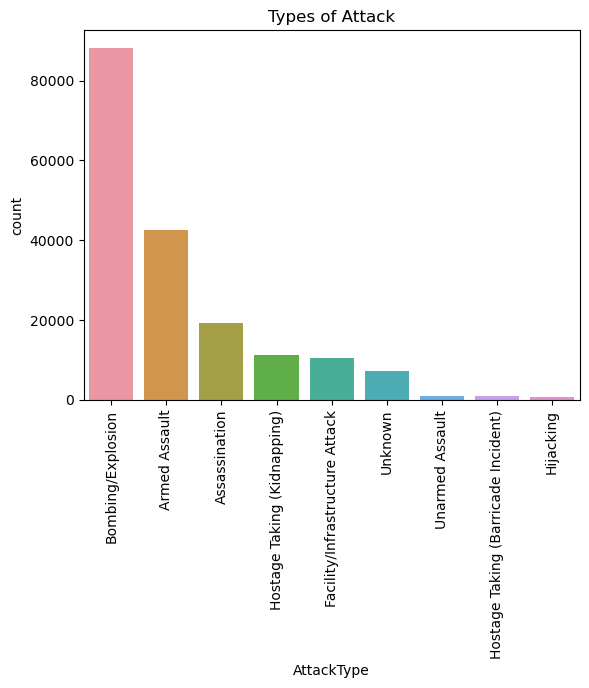

In [34]:
sns.countplot(data=df,x='AttackType',order=df['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Types of Attack')
plt.show()

In [35]:
df['Weapon_type'].value_counts()

Explosives            92426
Firearms              58524
Unknown               15157
Incendiary            11135
Melee                  3655
Chemical                321
Sabotage Equipment      141
car or truck bombs      136
Other                   114
Biological               35
Fake Weapons             33
Radiological             14
Name: Weapon_type, dtype: int64

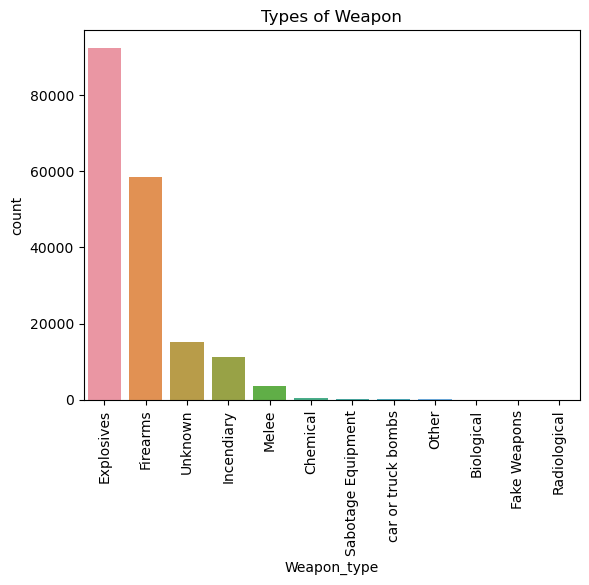

In [36]:
sns.countplot(data=df,x='Weapon_type',order=df['Weapon_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Types of Weapon')
plt.show()

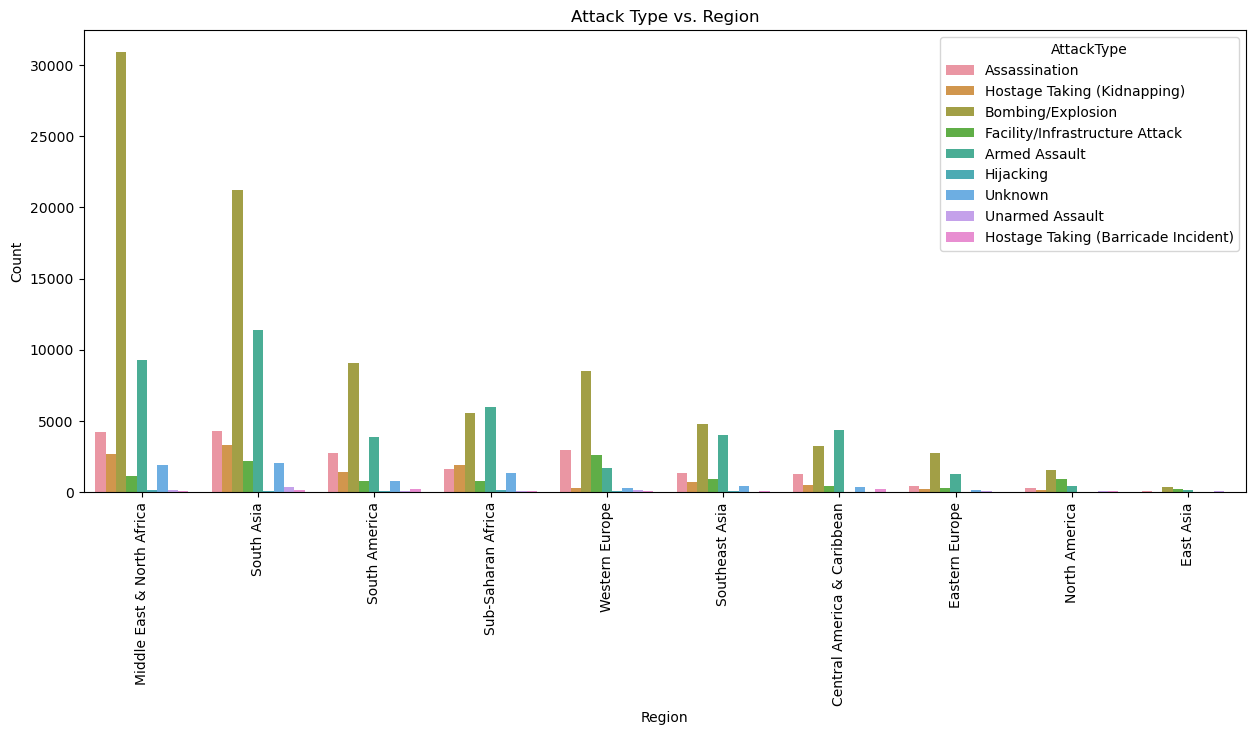

In [37]:
plt.subplots(figsize=(15,6))
sns.countplot(data=df, x='Region',order=df['Region'].value_counts().head(10).index, hue='AttackType')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Attack Type vs. Region')
plt.show()

In [38]:
df.groupby('Region')[['Killed','Wounded']].count().sort_values(by=['Killed','Wounded'],ascending=False).head(10)

,Killed,Wounded
Region,,
Middle East & North Africa,48201,46918
South Asia,44037,43082
South America,17306,17103
Sub-Saharan Africa,15937,14438
Western Europe,15727,14129
Southeast Asia,12209,12023
Central America & Caribbean,8022,7874
Eastern Europe,4978,4892
North America,3363,3335


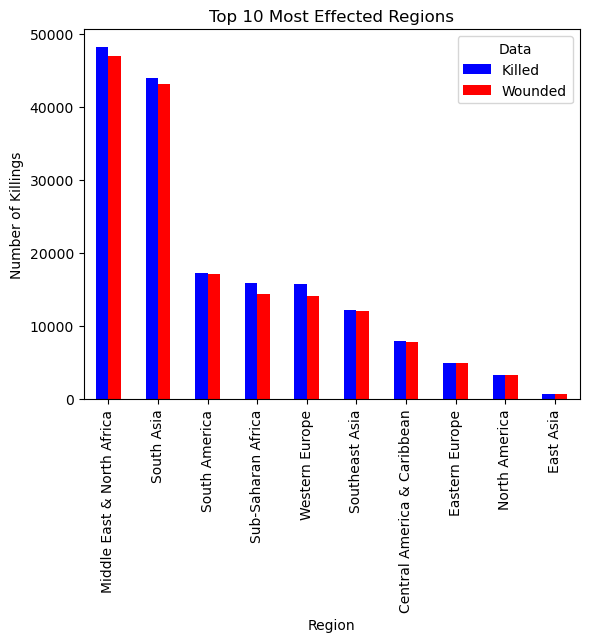

In [40]:
result=df.groupby('Region')[['Killed','Wounded']].count().sort_values(by=['Killed','Wounded'],ascending=False).head(10)

result.plot(kind='bar', color=['blue','red'])
plt.xlabel('Region')
plt.ylabel('Number of Killings')
plt.title('Top 10 Most Effected Regions')
plt.xticks(rotation=90)
plt.legend(title='Data', labels=['Killed', 'Wounded'])
plt.show();

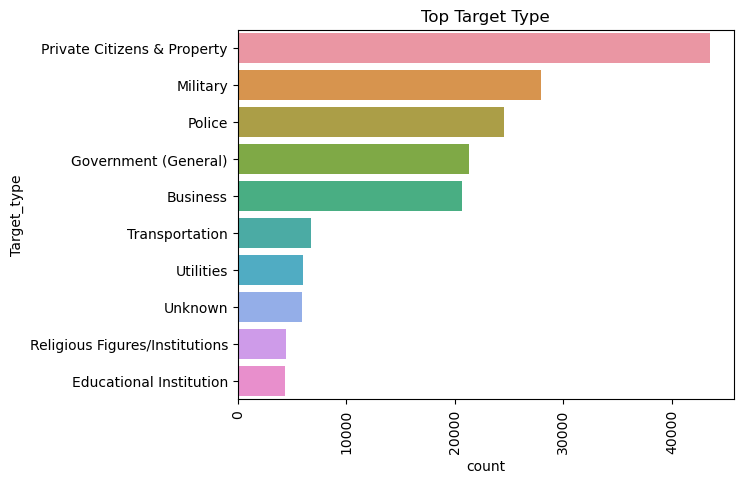

In [41]:
sns.countplot(data=df,y='Target_type',order=df['Target_type'].value_counts()[:10].index)
plt.title('Top Target Type')
plt.xticks(rotation=90)
plt.show()

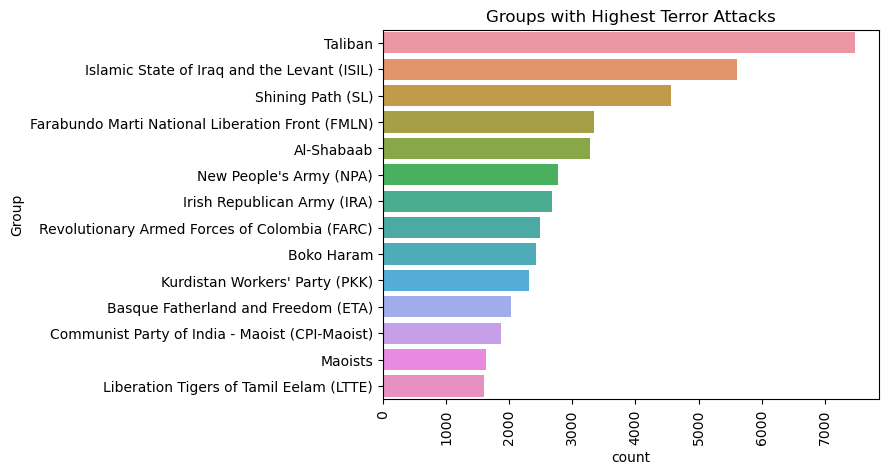

In [42]:
sns.countplot(data=df,y='Group',order=df['Group'].value_counts()[1:15].index)
plt.title('Groups with Highest Terror Attacks')
plt.xticks(rotation=90)
plt.show()